In [55]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql import functions as F

import matplotlib.pyplot as plt

In [6]:
spark = SparkSession.builder.appName("Delhi Metro Analysis").getOrCreate()


In [7]:
data = spark.read.csv("/kaggle/input/pyspark-dataset/Delhi-Metro-Network.csv", header =True, inferSchema=True)

In [8]:
print(data.show())

+----------+--------------------+------------------------+------------+------------+--------------+-----------+-----------+
|Station ID|        Station Name|Distance from Start (km)|        Line|Opening Date|Station Layout|   Latitude|  Longitude|
+----------+--------------------+------------------------+------------+------------+--------------+-----------+-----------+
|         1|            Jhil Mil|                    10.3|    Red line|  2008-04-06|      Elevated|   28.67579|   77.31239|
|         2| Welcome [Conn: Red]|                    46.8|   Pink line|  2018-10-31|      Elevated|    28.6718|   77.27756|
|         3|         DLF Phase 3|                    10.0| Rapid Metro|  2013-11-14|      Elevated|    28.4936|    77.0935|
|         4|          Okhla NSIC|                    23.8|Magenta line|  2017-12-25|      Elevated| 28.5544828| 77.2648487|
|         5|          Dwarka Mor|                    10.2|   Blue line|  2005-12-30|      Elevated|   28.61932|   77.03326|
|       

In [12]:
print(data.printSchema())

root
 |-- Station ID: integer (nullable = true)
 |-- Station Name: string (nullable = true)
 |-- Distance from Start (km): double (nullable = true)
 |-- Line: string (nullable = true)
 |-- Opening Date: date (nullable = true)
 |-- Station Layout: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)

None


In [13]:
data.select("Station ID", "Station Name").show()

+----------+--------------------+
|Station ID|        Station Name|
+----------+--------------------+
|         1|            Jhil Mil|
|         2| Welcome [Conn: Red]|
|         3|         DLF Phase 3|
|         4|          Okhla NSIC|
|         5|          Dwarka Mor|
|         6|Dilli Haat INA [C...|
|         7|    Noida Sector 143|
|         8|           Moolchand|
|         9|        Chawri Bazar|
|        10|           Maya Puri|
|        11|Central Secretari...|
|        12|    Noida Sector 146|
|        13|        Tikri Border|
|        14|            Jangpura|
|        15|  Major Mohit Sharma|
|        16|         Majlis Park|
|        17|  Bhikaji Cama Place|
|        18|Mundka Industrial...|
|        19|    Belvedere Towers|
|        20|        Adarsh Nagar|
+----------+--------------------+
only showing top 20 rows



In [14]:
data.select(["Line"]).show()

+------------+
|        Line|
+------------+
|    Red line|
|   Pink line|
| Rapid Metro|
|Magenta line|
|   Blue line|
|   Pink line|
|   Aqua line|
| Voilet line|
| Yellow line|
|   Pink line|
| Yellow line|
|   Aqua line|
|  Green line|
| Voilet line|
|    Red line|
|   Pink line|
|   Pink line|
|  Green line|
| Rapid Metro|
| Yellow line|
+------------+
only showing top 20 rows



In [16]:
data.filter(data["Line"] == "Blue line").show()

+----------+--------------------+------------------------+---------+------------+--------------+----------+----------+
|Station ID|        Station Name|Distance from Start (km)|     Line|Opening Date|Station Layout|  Latitude| Longitude|
+----------+--------------------+------------------------+---------+------------+--------------+----------+----------+
|         5|          Dwarka Mor|                    10.2|Blue line|  2005-12-30|      Elevated|  28.61932|  77.03326|
|        21|   Noida City Center|                    47.2|Blue line|  2009-12-11|      Elevated|  28.57466|  77.35608|
|        23|     Dwarka Sector 9|                     2.7|Blue line|  2006-01-04|      Elevated|  28.57487|  77.06454|
|        26|     R K Ashram Marg|                    28.9|Blue line|  2005-12-30|      Elevated|  28.63923|   77.2084|
|        27|    Uttam Nagar West|                    12.4|Blue line|  2005-12-30|      Elevated|  28.62481|   77.0653|
|        30|         Golf Course|               

In [18]:
data.filter(data["Line"] == "Blue line").select(["Station ID","Line"]).show()

+----------+---------+
|Station ID|     Line|
+----------+---------+
|         5|Blue line|
|        21|Blue line|
|        23|Blue line|
|        26|Blue line|
|        27|Blue line|
|        30|Blue line|
|        35|Blue line|
|        37|Blue line|
|        38|Blue line|
|        45|Blue line|
|        49|Blue line|
|        53|Blue line|
|        60|Blue line|
|        69|Blue line|
|        72|Blue line|
|        74|Blue line|
|        75|Blue line|
|        78|Blue line|
|        84|Blue line|
|        89|Blue line|
+----------+---------+
only showing top 20 rows



In [19]:
data.printSchema()

root
 |-- Station ID: integer (nullable = true)
 |-- Station Name: string (nullable = true)
 |-- Distance from Start (km): double (nullable = true)
 |-- Line: string (nullable = true)
 |-- Opening Date: date (nullable = true)
 |-- Station Layout: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)



In [22]:


data = data.withColumn("Distance from Start (miles)",col("Distance from Start (km)") * 0.6213171)

In [38]:
data = data.withColumnRenamed("Distance from Start (km)","DistanceKM")

In [39]:

data.groupBy("Line").agg(
    F.avg("DistanceKM").alias("Average Distance"),
    F.max("DistanceKM").alias("Max Distance")
).show()

+-----------------+------------------+------------+
|             Line|  Average Distance|Max Distance|
+-----------------+------------------+------------+
|      Rapid Metro|  5.70909090909091|        10.0|
|        Blue line|26.144897959183673|        52.7|
|Green line branch|1.0666666666666667|         2.1|
|       Green line|11.380952380952383|        24.8|
| Blue line branch|               4.0|         8.1|
|      Voilet line|20.617647058823525|        43.5|
|      Yellow line|21.462162162162162|        45.7|
|        Gray line|               1.8|         3.9|
|         Red line| 16.55862068965517|        32.7|
|        Pink line|28.773684210526323|        52.6|
|     Magenta line|            17.656|        33.1|
|      Orange line|10.566666666666665|        20.8|
|        Aqua line|13.352380952380955|        27.1|
+-----------------+------------------+------------+



In [41]:
data.createOrReplaceTempView("metro")
spark.sql("SELECT Line, COUNT(*) as StationCount FROM metro GROUP BY Line").show()

+-----------------+------------+
|             Line|StationCount|
+-----------------+------------+
|      Rapid Metro|          11|
|        Blue line|          49|
|Green line branch|           3|
|       Green line|          21|
| Blue line branch|           8|
|      Voilet line|          34|
|      Yellow line|          37|
|        Gray line|           3|
|         Red line|          29|
|        Pink line|          38|
|     Magenta line|          25|
|      Orange line|           6|
|        Aqua line|          21|
+-----------------+------------+



In [43]:
stations_per_line = data.groupBy("Line").count()

In [45]:
stations_per_line.show()

+-----------------+-----+
|             Line|count|
+-----------------+-----+
|      Rapid Metro|   11|
|        Blue line|   49|
|Green line branch|    3|
|       Green line|   21|
| Blue line branch|    8|
|      Voilet line|   34|
|      Yellow line|   37|
|        Gray line|    3|
|         Red line|   29|
|        Pink line|   38|
|     Magenta line|   25|
|      Orange line|    6|
|        Aqua line|   21|
+-----------------+-----+



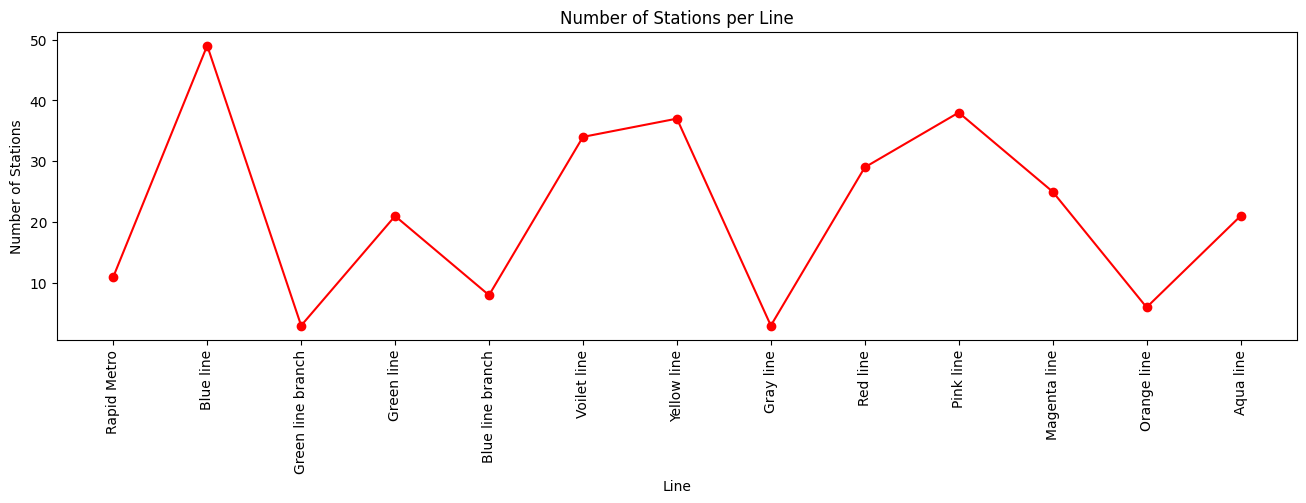

In [54]:


stations_per_line_pd = stations_per_line.toPandas()
plt.figure(figsize=(16, 4))
plt.plot(stations_per_line_pd['Line'], stations_per_line_pd['count'], marker='o', color="red")
plt.title('Number of Stations per Line')
plt.xlabel('Line')
plt.ylabel('Number of Stations')
plt.xticks(rotation=90)
plt.show()

In [56]:
data.columns

['Station ID',
 'Station Name',
 'DistanceKM',
 'Line',
 'Opening Date',
 'Station Layout',
 'Latitude',
 'Longitude',
 'Distance from Start (miles)']

In [61]:
data.describe(["DistanceKM","Distance from Start (miles)"]).show()

+-------+------------------+---------------------------+
|summary|        DistanceKM|Distance from Start (miles)|
+-------+------------------+---------------------------+
|  count|               285|                        285|
|   mean|19.218947368421052|               11.941060644|
| stddev|14.002861589363878|          8.700217354404952|
|    min|               0.0|                        0.0|
|    max|              52.7|                32.74341117|
+-------+------------------+---------------------------+



In [62]:
data.select(["DistanceKM","Distance from Start (miles)"]).describe().show()

+-------+------------------+---------------------------+
|summary|        DistanceKM|Distance from Start (miles)|
+-------+------------------+---------------------------+
|  count|               285|                        285|
|   mean|19.218947368421052|               11.941060644|
| stddev|14.002861589363878|          8.700217354404952|
|    min|               0.0|                        0.0|
|    max|              52.7|                32.74341117|
+-------+------------------+---------------------------+



In [63]:
data.collect()

[Row(Station ID=1, Station Name='Jhil Mil', DistanceKM=10.3, Line='Red line', Opening Date=datetime.date(2008, 4, 6), Station Layout='Elevated', Latitude=28.67579, Longitude=77.31239, Distance from Start (miles)=6.39956613),
 Row(Station ID=2, Station Name='Welcome [Conn: Red]', DistanceKM=46.8, Line='Pink line', Opening Date=datetime.date(2018, 10, 31), Station Layout='Elevated', Latitude=28.6718, Longitude=77.27756, Distance from Start (miles)=29.077640279999997),
 Row(Station ID=3, Station Name='DLF Phase 3', DistanceKM=10.0, Line='Rapid Metro', Opening Date=datetime.date(2013, 11, 14), Station Layout='Elevated', Latitude=28.4936, Longitude=77.0935, Distance from Start (miles)=6.213170999999999),
 Row(Station ID=4, Station Name='Okhla NSIC', DistanceKM=23.8, Line='Magenta line', Opening Date=datetime.date(2017, 12, 25), Station Layout='Elevated', Latitude=28.5544828, Longitude=77.2648487, Distance from Start (miles)=14.787346979999999),
 Row(Station ID=5, Station Name='Dwarka Mor', 